# Importing data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the excel sheet
data = pd.read_excel(r"C:\Users\omarj\Downloads\Updated data for Equiv circuit.xlsx",0, header=None, skiprows=2, names=['Freq', 'A_R', 'A_I','F','W_R','W_I','F','M_R','M_I','F','N_R','N_I','F','S_R','S_I'])
data1 = pd.read_excel(r"C:\Users\omarj\Downloads\Updated data for Equiv circuit.xlsx",1, header=None, skiprows=1, names=['F', 'E_nR', 'E_nI'])
data2 = pd.read_excel(r"C:\Users\omarj\Downloads\Updated data for Equiv circuit.xlsx",2, header=None, skiprows=1, names=['F', 'E_mR', 'E_mI'])
data3 = pd.read_excel(r"C:\Users\omarj\Downloads\Updated data for Equiv circuit.xlsx",3, header=None, skiprows=1, names=['F', 'E_wR', 'E_wI'])

# Defining the complex permittivities ( Theoretical values)
e_N = np.array(data1['E_nR'] - 1j* data1['E_nI'])
e_NR = e_N.real
e_NI = -1*e_N.imag
e_NA = abs(e_N)

e_M = np.array(data2['E_mR'] - 1j* data2['E_mI'])
e_MR = e_M.real
e_MI = -1*e_M.imag
e_MA = abs(e_M)

e_W = np.array(data3['E_wR'] - 1j* data3['E_wI'])
e_WR = e_W.real
e_WI = -1*e_W.imag

e_A = 1 - 1j*0
e_AR = e_A.real
e_AI = -1*e_A.imag


# Defining the reflection coefficients
F = np.array(data["F"]/1e9)
A_r = np.array(data["A_R"] + 1j * data["A_I"])
W_r = np.array(data["W_R"] + 1j * data["W_I"])
M_r = np.array(data["M_R"] + 1j * data["M_I"])
N_r = np.array(data["N_R"] + 1j * data["N_I"])
S_r = np.array(data["S_R"] + 1j * data["S_I"])

rho_m = N_r

# Delta_ij = rho_i - rho_j
Dm2 = rho_m - A_r
D13 = S_r - W_r
Dm1 = rho_m - S_r
D32 = W_r - A_r
Dm3 = rho_m - W_r
D21 = A_r - S_r 
Dm1 = rho_m - S_r
D32 = W_r - A_r

# Experimental permittivity of NaCl
e_NaCl = -((Dm2*D13*e_W)/(Dm1*D32)) - ((Dm3*D21*e_A)/(Dm1*D32))
e_Nreal = e_NaCl.real
e_Nimag = -1*e_NaCl.imag
e_Nabs = abs(e_NaCl)


rho_m = M_r


Dm2 = rho_m - A_r
D13 = S_r - W_r
Dm1 = rho_m - S_r
D32 = W_r - A_r
Dm3 = rho_m - W_r
D21 = A_r - S_r 
Dm1 = rho_m - S_r
D32 = W_r - A_r

# Experimental permittivity CH_3OH
e_methanol = -((Dm2*D13*e_W)/(Dm1*D32)) - ((Dm3*D21*e_A)/(Dm1*D32))
e_Mreal = e_methanol.real
e_Mimag = -1*e_methanol.imag
e_Mabs = abs(e_methanol)


# NaCl complex permittivity

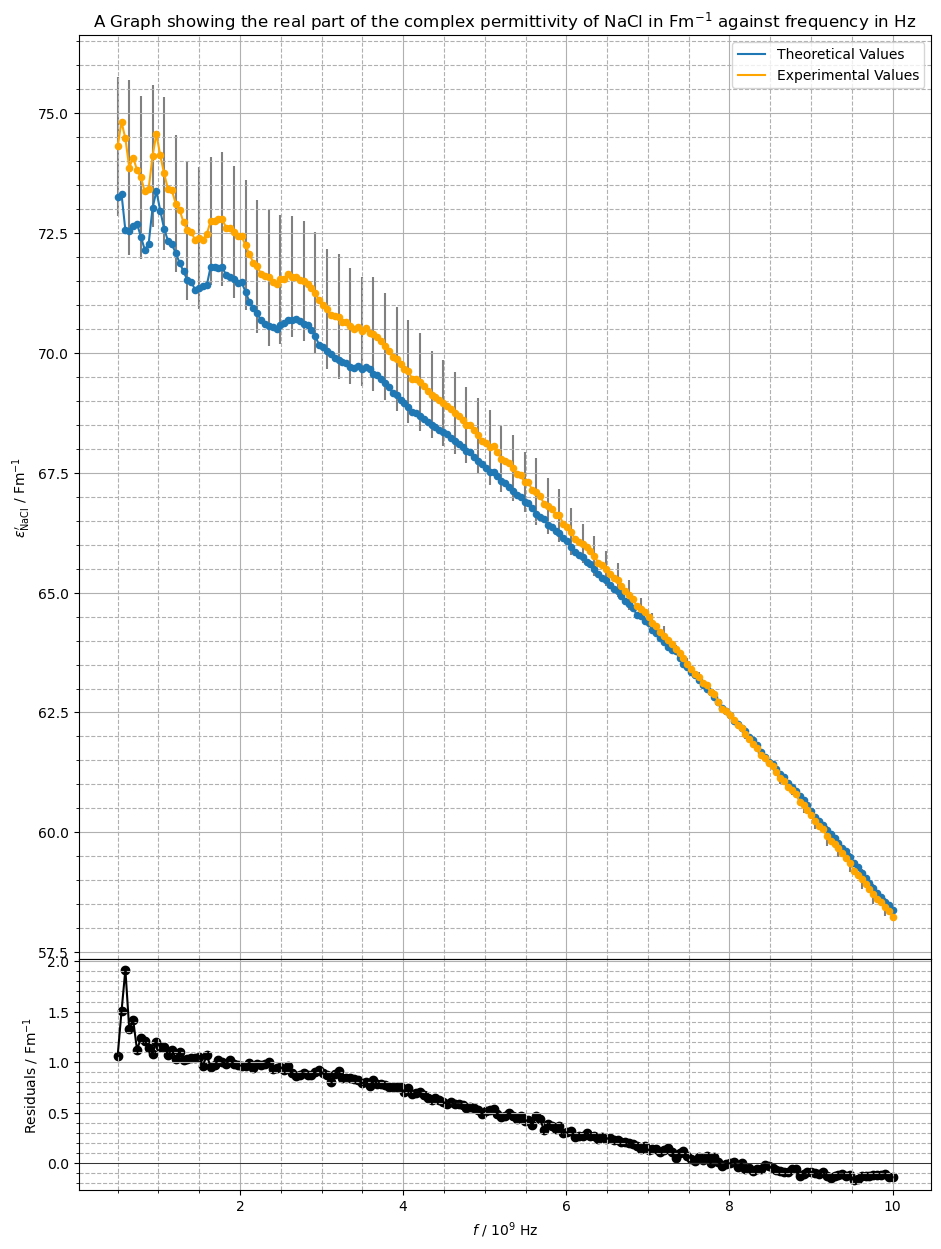

In [2]:
residuals1 = e_Nreal - e_NR


Accur = abs(((e_Nreal/e_NR)-1)*100)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 15), gridspec_kw={'height_ratios': [4, 1]})


ax1.plot(F, e_NR,  label=r'Theoretical Values', zorder=2)
ax1.scatter(F, e_NR, s=20, zorder=2)


ax1.errorbar(F[::3], e_Nreal[::3], yerr=Accur[::3], fmt='o', color='black', ecolor='grey', markersize=1, zorder=1) 


ax1.plot(F, e_Nreal,  label=r'Experimental Values', color = 'orange',zorder = 2)
ax1.scatter(F, e_Nreal, s=20, color='orange', zorder= 2)



ax1.minorticks_on()
ax1.grid(visible=True, which='major', linestyle='-')
ax1.grid(visible=True, which='minor', linestyle='--')
ax1.set_title(r'A Graph showing the real part of the complex permittivity of NaCl in Fm$^{-1}$ against frequency in Hz')
ax1.set_ylabel(r'$\varepsilon^{\prime}_{\mathrm{Na}\mathrm{Cl}}$ / Fm$^{-1}$')
ax1.legend()


ax2.plot(F, residuals1, color='black')
ax2.scatter(F, residuals1, color='black')
ax2.axhline(0, color='black', linewidth=0.5) 
ax2.minorticks_on()
ax2.grid(visible=True, which='major', linestyle='-')
ax2.grid(visible=True, which='minor', linestyle='--')
ax2.set_xlabel(r'$f$ / $10^9$ Hz')
ax2.set_ylabel(r'Residuals / Fm$^{-1}$')


plt.subplots_adjust(hspace=0)  
plt.savefig('Graph1', dpi=1000)
plt.show()

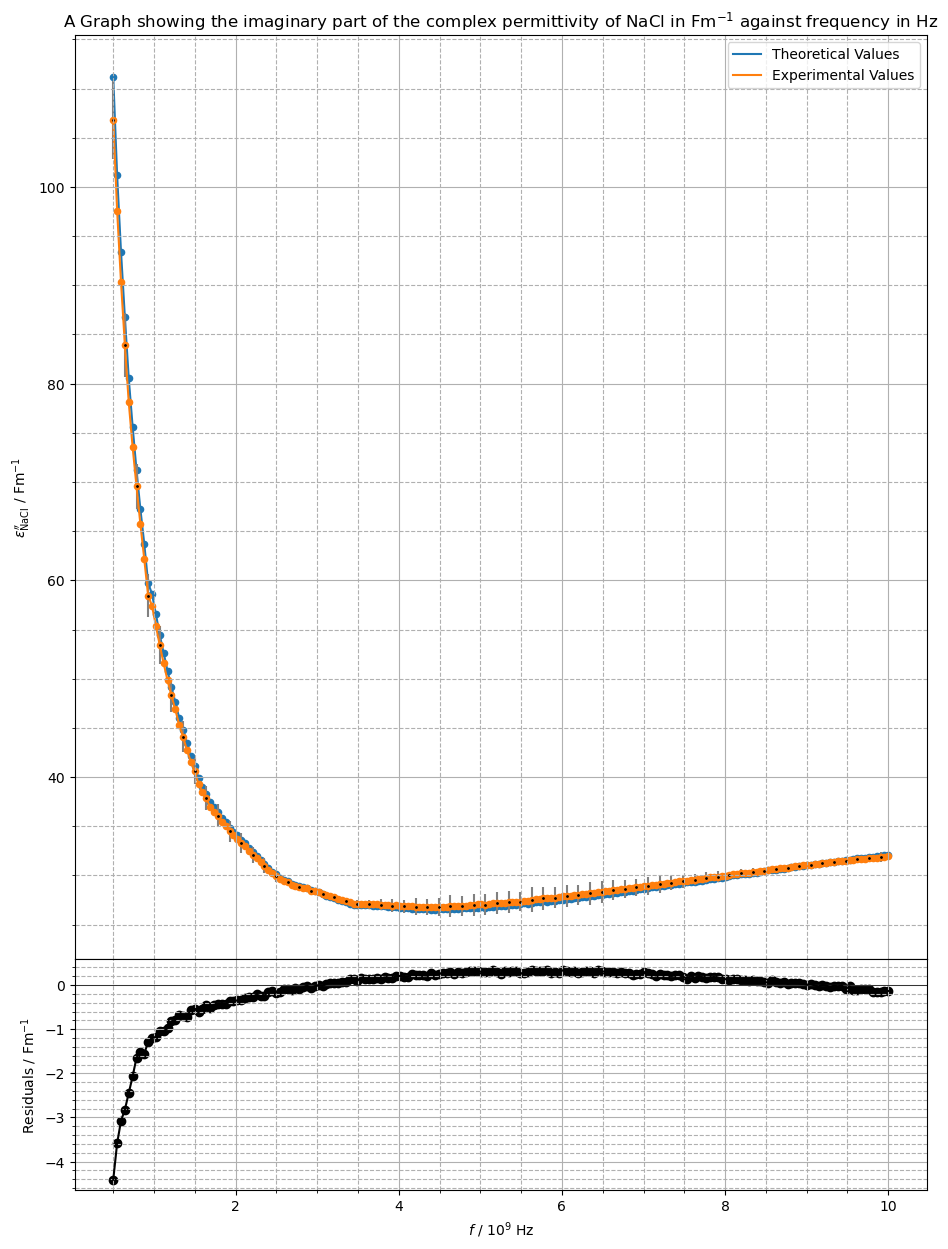

In [3]:
residuals2 = e_Nimag - e_NI

Accur1 = abs(((e_Nimag/e_NI)-1)*100)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 15), gridspec_kw={'height_ratios': [4, 1]})

ax1.plot(F, e_NI,  label=r'Theoretical Values',zorder = 1)
ax1.scatter(F, e_NI, s=20, zorder = 1)

ax1.errorbar(F[::3], e_Nimag[::3], yerr=Accur1[::3], fmt='o', color='black', ecolor='grey', markersize=1, zorder=1) 


ax1.plot(F, e_Nimag,  label=r'Experimental Values', zorder = 1)
ax1.scatter(F, e_Nimag, s=20, zorder = 1)



ax1.minorticks_on()
ax1.grid(visible=True, which='major', linestyle='-')
ax1.grid(visible=True, which='minor', linestyle='--')
ax1.set_title(r'A Graph showing the imaginary part of the complex permittivity of NaCl in Fm$^{-1}$ against frequency in Hz')
ax1.set_ylabel(r'$\varepsilon^{\prime\prime}_{\mathrm{Na}\mathrm{Cl}}$ / Fm$^{-1}$')
ax1.legend()



ax2.plot(F, residuals2, color='black')
ax2.scatter(F, residuals2, color='black')
ax2.axhline(0, color='black', linewidth=0.5) 
ax2.minorticks_on()
ax2.grid(visible=True, which='major', linestyle='-')
ax2.grid(visible=True, which='minor', linestyle='--')
ax2.set_xlabel(r'$f$ / $10^9$ Hz')
ax2.set_ylabel(r'Residuals / Fm$^{-1}$')


plt.subplots_adjust(hspace=0)  
plt.savefig('Graph2', dpi=1000)
plt.show()

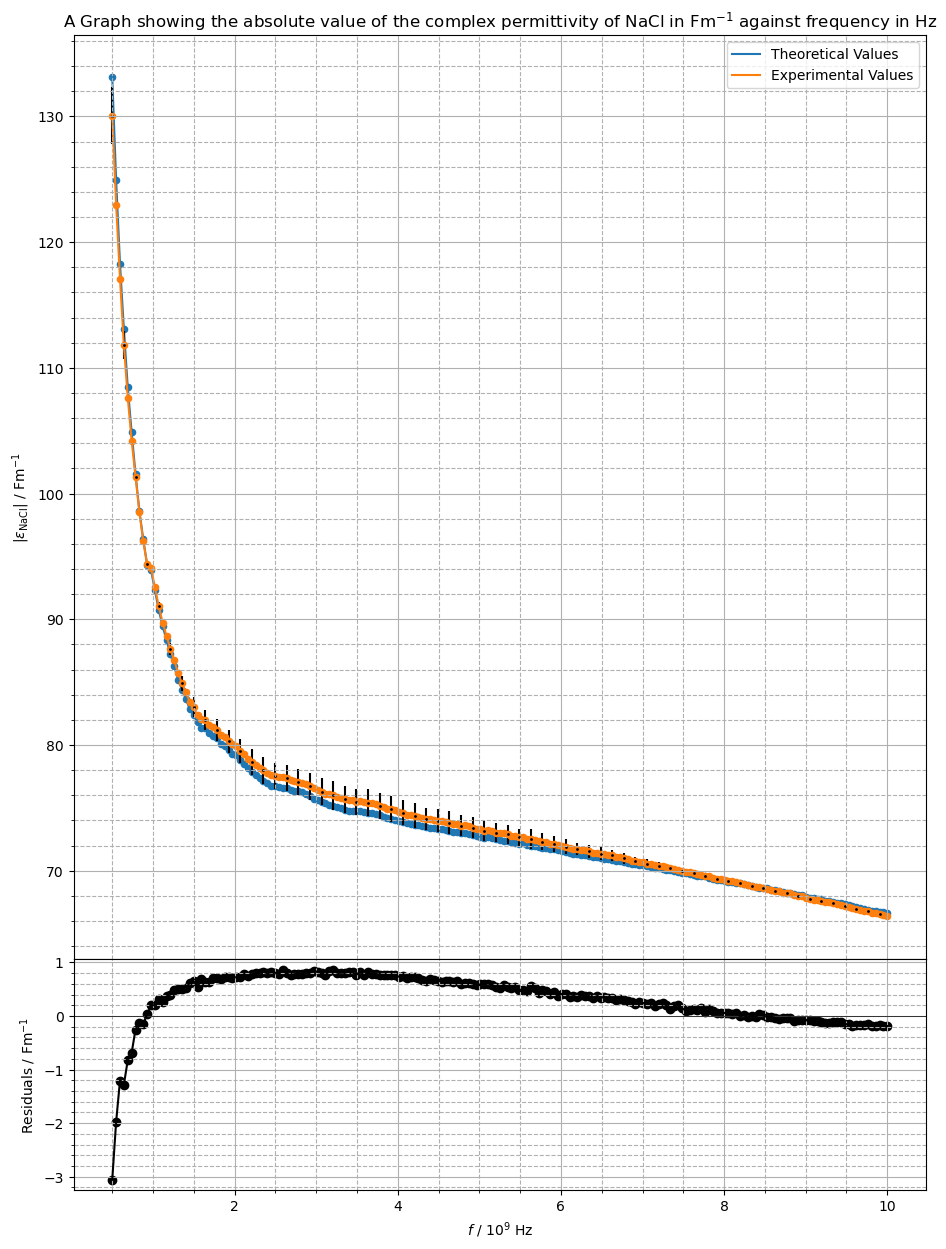

In [4]:

residuals3 = e_Nabs - e_NA
Accur2 = abs(((e_Nabs/e_NA)-1)*100)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 15), gridspec_kw={'height_ratios': [4, 1]})


ax1.plot(F, e_NA,  label=r'Theoretical Values', zorder=1)
ax1.scatter(F, e_NA, s=20, zorder=1)


ax1.errorbar(F[::3], e_Nabs[::3], yerr=Accur2[::3], fmt='o', color='black', ecolor='black', markersize=1, zorder=1) 

ax1.plot(F, e_Nabs,  label=r'Experimental Values', zorder=1)
ax1.scatter(F, e_Nabs, s=20, zorder=1)



ax1.minorticks_on()
ax1.grid(visible=True, which='major', linestyle='-')
ax1.grid(visible=True, which='minor', linestyle='--')
ax1.set_title(r'A Graph showing the absolute value of the complex permittivity of NaCl in Fm$^{-1}$ against frequency in Hz')
ax1.set_ylabel(r'$|\varepsilon_{\mathrm{Na}\mathrm{Cl}}|$ / Fm$^{-1}$')
ax1.legend()



ax2.plot(F, residuals3, color='black')
ax2.scatter(F, residuals3, color='black')
ax2.axhline(0, color='black', linewidth=0.5) 
ax2.minorticks_on()
ax2.grid(visible=True, which='major', linestyle='-')
ax2.grid(visible=True, which='minor', linestyle='--')
ax2.set_xlabel(r'$f$ / $10^9$ Hz')
ax2.set_ylabel(r'Residuals / Fm$^{-1}$')


plt.subplots_adjust(hspace=0)  
plt.savefig('Graph3', dpi=1000)
plt.show()

# CH3OH(Methanol) Complex permittivity

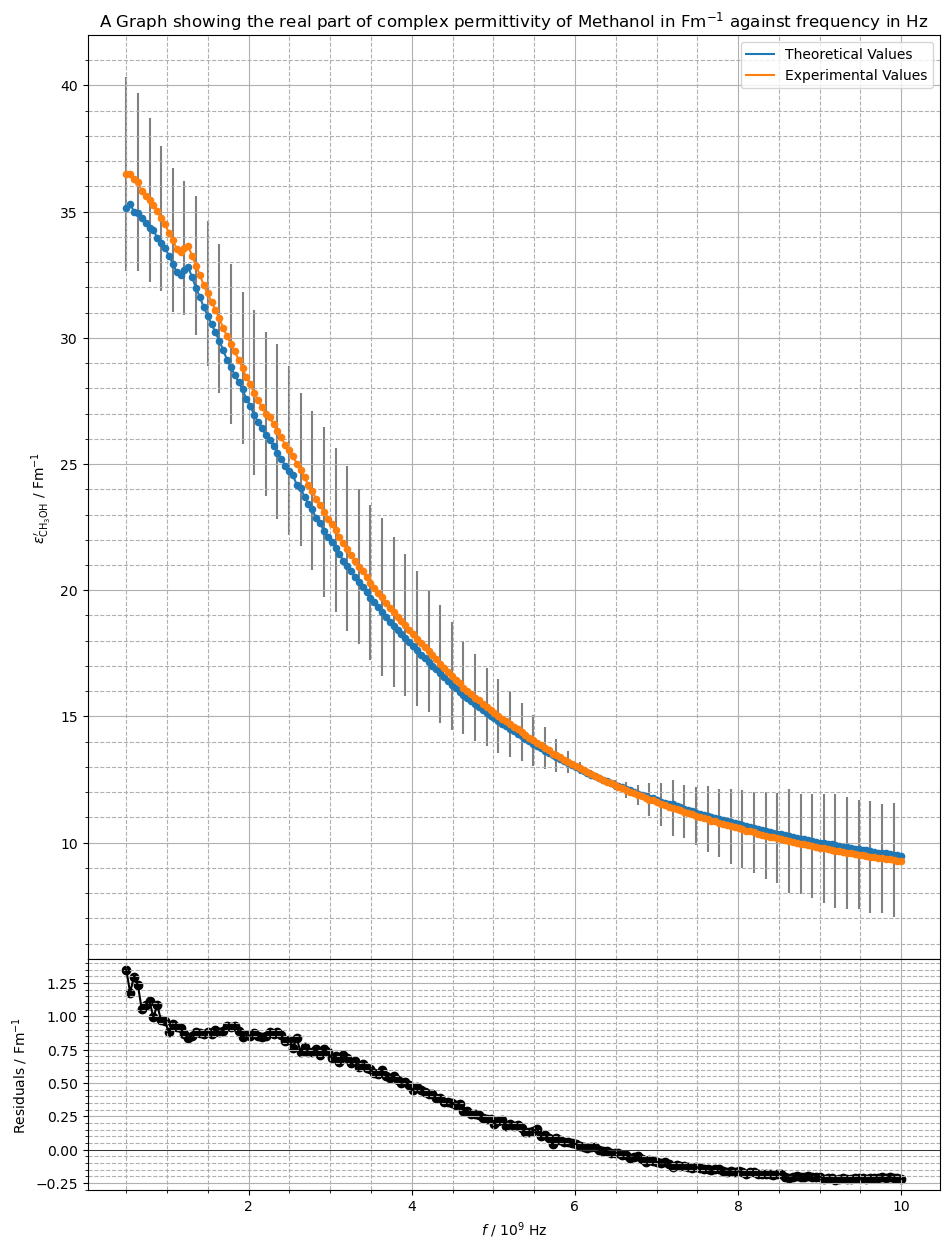

In [45]:

residuals4 = e_Mreal - e_MR

Accur3 = abs(((e_Mreal/e_MR)-1)*100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 15), gridspec_kw={'height_ratios': [4, 1]})


ax1.plot(F, e_MR,  label=r'Theoretical Values', zorder =2)
ax1.scatter(F, e_MR, s=20, zorder =2)
ax1.errorbar(F[::3], e_Mreal[::3], yerr=Accur3[::3], fmt='o', color='black', ecolor='grey', markersize=1, zorder=1) 
ax1.plot(F, e_Mreal,  label=r'Experimental Values', zorder =2)
ax1.scatter(F, e_Mreal, s=20, zorder =2)



ax1.minorticks_on()
ax1.grid(visible=True, which='major', linestyle='-')
ax1.grid(visible=True, which='minor', linestyle='--')
ax1.set_title(r'A Graph showing the real part of complex permittivity of Methanol in Fm$^{-1}$ against frequency in Hz')
ax1.set_ylabel(r'$\varepsilon^{\prime}_{\mathrm{CH}_3\mathrm{OH}}$ / Fm$^{-1}$')
ax1.legend()


ax2.plot(F, residuals4, color='black')
ax2.scatter(F, residuals4, color='black')
ax2.axhline(0, color='black', linewidth=0.5) 
ax2.minorticks_on()
ax2.grid(visible=True, which='major', linestyle='-')
ax2.grid(visible=True, which='minor', linestyle='--')
ax2.set_xlabel(r'$f$ / $10^9$ Hz')
ax2.set_ylabel(r'Residuals / Fm$^{-1}$')


plt.subplots_adjust(hspace=0)  
plt.savefig('Graph4', dpi=1000)
plt.show()

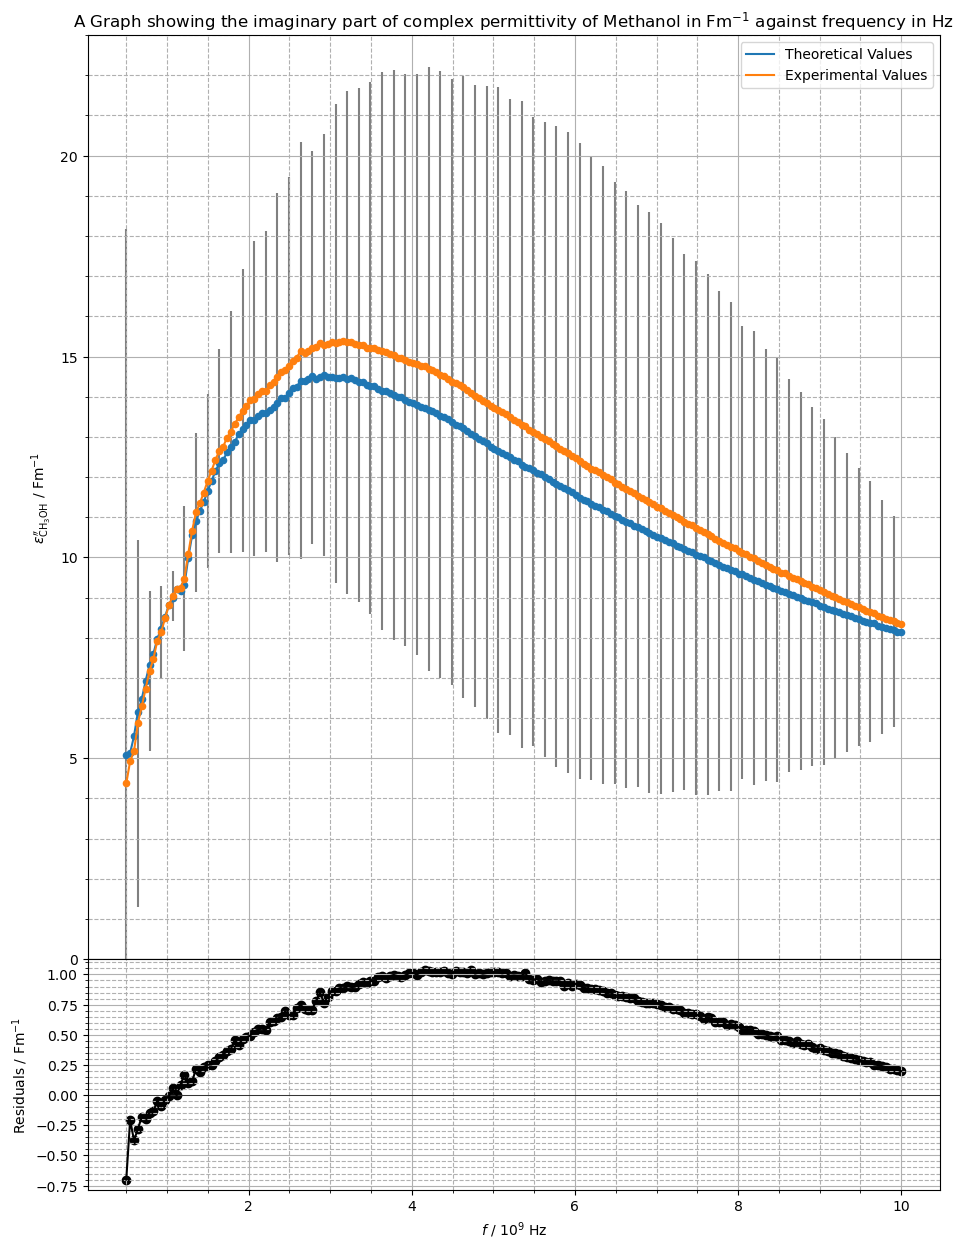

In [46]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 15), gridspec_kw={'height_ratios': [4, 1]})


residuals = e_Mimag - e_MI

Accur4 = abs(((e_Mimag/e_MI)-1)*100)

ax1.plot(F, e_MI,  label=r'Theoretical Values', zorder=2)
ax1.scatter(F, e_MI, s=20, zorder=2)

ax1.errorbar(F[::3], e_Mimag[::3], yerr=Accur4[::3], fmt='o', color='black', ecolor='grey', markersize=1, zorder=1) 

ax1.plot(F, e_Mimag,  label=r'Experimental Values', zorder=2)
ax1.scatter(F, e_Mimag, s=20, zorder=2)

ax1.minorticks_on()
ax1.grid(visible=True, which='major', linestyle='-')
ax1.grid(visible=True, which='minor', linestyle='--')
ax1.set_title(r'A Graph showing the imaginary part of complex permittivity of Methanol in Fm$^{-1}$ against frequency in Hz')
ax1.set_ylabel(r'$\varepsilon^{\prime\prime}_{\mathrm{CH}_3\mathrm{OH}}$ / Fm$^{-1}$')
ax1.set_ylim(0, 23)
ax1.legend()


ax2.plot(F, residuals, color='black')
ax2.scatter(F, residuals, color='black')
ax2.axhline(0, color='black', linewidth=0.5) 
ax2.minorticks_on()
ax2.grid(visible=True, which='major', linestyle='-')
ax2.grid(visible=True, which='minor', linestyle='--')
ax2.set_xlabel(r'$f$ / $10^9$ Hz')
ax2.set_ylabel(r'Residuals / Fm$^{-1}$')

plt.subplots_adjust(hspace=0)  
plt.savefig('Graph5', dpi=1000)
plt.show()

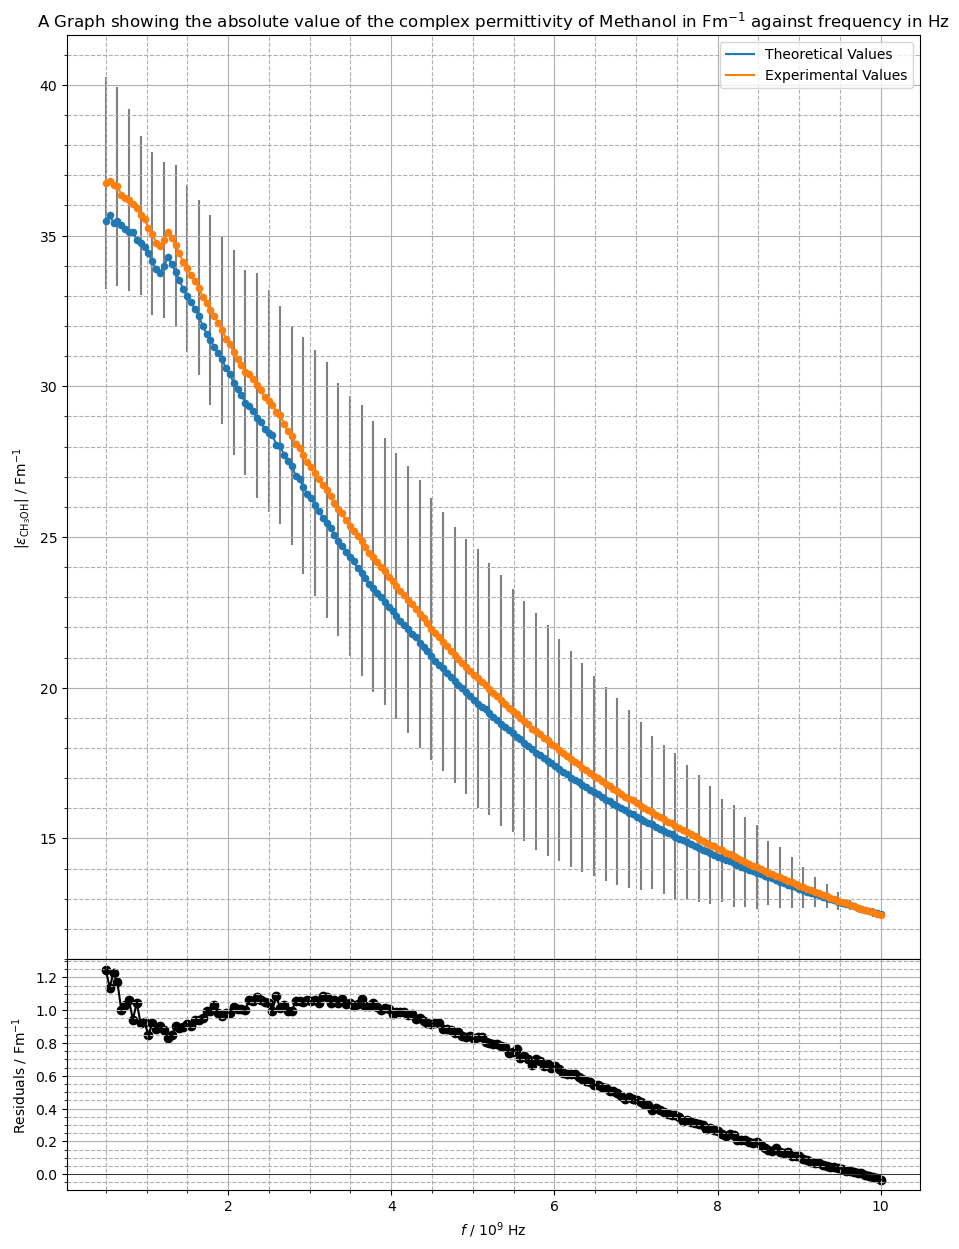

In [47]:
Accur5 = abs(((e_Mabs/e_MA)-1)*100)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 15), gridspec_kw={'height_ratios': [4, 1]})


residuals6 = e_Mabs - e_MA

ax1.plot(F, e_MA,  label=r'Theoretical Values', zorder = 2)
ax1.scatter(F, e_MA, s=20, zorder = 2)

ax1.errorbar(F[::3], e_Mabs[::3], yerr=Accur5[::3], fmt='o', color='black', ecolor='grey', markersize=1, zorder=1) 

ax1.plot(F, e_Mabs,  label=r'Experimental Values', zorder = 2)
ax1.scatter(F, e_Mabs, s=20, zorder = 2)



ax1.minorticks_on()
ax1.grid(visible=True, which='major', linestyle='-')
ax1.grid(visible=True, which='minor', linestyle='--')
ax1.set_title(r'A Graph showing the absolute value of the complex permittivity of Methanol in Fm$^{-1}$ against frequency in Hz')
ax1.set_ylabel(r'$|\varepsilon_{\mathrm{CH}_3\mathrm{OH}}|$ / Fm$^{-1}$ ')
ax1.legend()


ax2.plot(F, residuals6, color='black')
ax2.scatter(F, residuals6, color='black')
ax2.axhline(0, color='black', linewidth=0.5) 
ax2.minorticks_on()
ax2.grid(visible=True, which='major', linestyle='-')
ax2.grid(visible=True, which='minor', linestyle='--')
ax2.set_xlabel(r'$f$ / $10^9$ Hz')
ax2.set_ylabel(r'Residuals / Fm$^{-1}$')

plt.subplots_adjust(hspace=0)  
plt.savefig('Graph6', dpi=1000)
plt.show()